In [1]:
###########################################
## Jax Demo
## Goal - fool around with Jax AutoDiff (function composition/transformation) library
##
## Author: Chris Meaney
## Date: Feb 2021
###########################################

In [2]:
## Import JAX dependencies
import jax.numpy as jnp
from jax import random

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas data wrangling, summarization, etc.
import pandas as pd

## Old numpy - for comparing speed/flexibility JAX approach vs. existing NumPy/Scipy capabilities
import numpy as onp

In [3]:
## Set seed
key = random.PRNGKey(912834)

In [4]:
key

DeviceArray([     0, 912834], dtype=uint32)

In [5]:
############################################
##
##
## Random Numbers in JAX (from various distributions, sampling mechanisms, etc.)
##
##
############################################

In [6]:
## Randomly sampling from a list of items - with uniform probability (and replacement=True)
## Note: it does not seem I can sample from "strings", need to map to integers first
ints = jnp.array([1,2,3,8,9])
x = random.choice(key, a=ints, shape=(10,), replace=True)
print(x)

[8 2 8 2 1 8 3 1 9 1]


In [7]:
## Sampling with unequal probabilities of selection
ints = jnp.array([1,2,3])
probs = jnp.array([0.6,0.3,0.1])
x = random.choice(key, a=ints, shape=(1000,), replace=True, p=probs)
print(pd.Series(x).value_counts(normalize=True))

1    0.602
2    0.305
3    0.093
dtype: float64


In [8]:
## Randomly sample integers
x = random.randint(key, minval=0, maxval=10, shape=(10000,))
pd.Series(x).value_counts().sort_index()

0     955
1    1074
2    1040
3     978
4     991
5     973
6    1027
7     979
8     968
9    1015
dtype: int64

In [9]:
## Randomly shuffle/permute an index of integers
x = jnp.array([0,0,0,0,1,1,1,1])
random.permutation(key, x)

DeviceArray([0, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

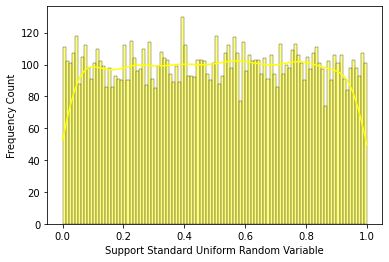

In [10]:
## Randomly sample a number of uniform variates
x = random.uniform(key, minval=0, maxval=1, shape=(10000,))
df = pd.DataFrame(x)
df.columns = ['x']
ax = sns.histplot(df, x=x, bins=100, kde=True, color='yellow')
ax.set(xlabel='Support Standard Uniform Random Variable', ylabel='Frequency Count')
plt.show()

In [11]:
## 10 Univariate Normals
x = random.normal(key, (10,))
print(x)

[-0.19112545  1.1628785  -0.18441123  2.408333   -1.1187171  -0.17527148
 -1.1874584  -1.3602115  -1.0849748   0.2564871 ]


In [12]:
## 100 location/scale Normals
x = random.normal(key, (1000,))
x = 2*x + 10
pd.Series(x).describe()

count    1000.000000
mean        9.998937
std         2.019339
min         3.788454
25%         8.573010
50%        10.021622
75%        11.303478
max        17.007282
dtype: float64

In [13]:
## Multivariate Normal distribution
mu_vec = jnp.array([-1.0, 0.0, 1.0])
cov_mat = jnp.array([[1.0,0.75,0.25],
                    [0.75,1.0,0.75],
                    [0.25,0.75,1.0]])
#cov_mat
x = random.multivariate_normal(key, mean=mu_vec, cov=cov_mat, shape=(10000,))
df = pd.DataFrame(x)
df.columns = ['x1','x2','x3']
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,-1.004779,0.004613,1.002756
std,0.991407,0.998819,1.004644
min,-4.713915,-3.571638,-2.739073
25%,-1.670704,-0.687138,0.312107
50%,-1.009128,-0.004622,1.002716
75%,-0.350335,0.682165,1.681971
max,2.747562,3.755401,4.281752


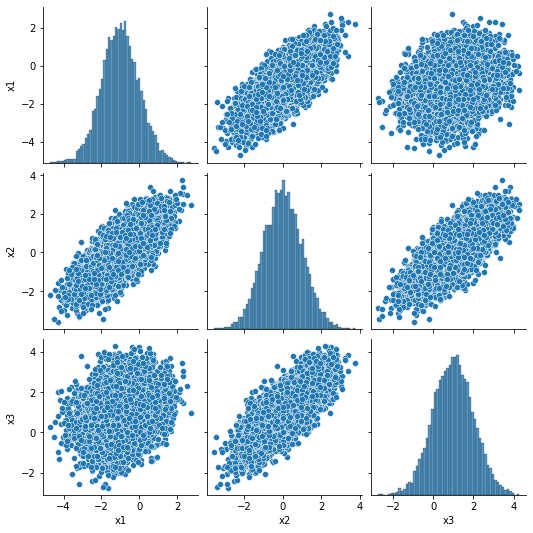

In [14]:
sns.pairplot(df)

In [15]:
## Bernoulli
x = random.bernoulli(key, p=0.25, shape=(100,))
pd.Series(x).value_counts()

False    71
True     29
dtype: int64

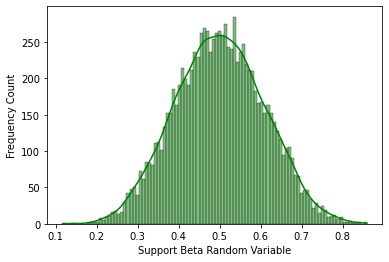

In [16]:
## Beta distribution
x = random.beta(key, a=10, b=10, shape=(10000,))
df = pd.DataFrame(x)
df.columns = ['x']
ax = sns.histplot(df, x=x, bins=100, kde=True, color='green')
ax.set(xlabel='Support Beta Random Variable', ylabel='Frequency Count')
plt.show()

In [17]:
## Categorical distirbutions
## Note: What is return is INDEX/INTEGER corresponding to slot/state that categorical draw returns
## Further: we parameterize the model in terms of LOGITS and not PROBABILITIES
## The length attribute of the LOGIT vector will determine the number of states for the categorical distirbution
num_elem = 6
logit_vector = jnp.repeat(0.0, num_elem) # Equally probably draws over six states (physically like a unbiased die)
x = random.categorical(key, logits=logit_vector, shape=(10000,))
pd.Series(x).value_counts(normalize=True).sort_index()

0    0.1666
1    0.1662
2    0.1688
3    0.1707
4    0.1690
5    0.1587
dtype: float64

In [18]:
## Now fool around with a biased die
num_elem = 6
logit_vector = jnp.array([-0.4, -0.2, -0.05, 0.05, 0.2, 0.4]) # Biased die logits
x = random.categorical(key, logits=logit_vector, shape=(10000,))
pd.Series(x).value_counts(normalize=True).sort_index()

0    0.1102
1    0.1330
2    0.1553
3    0.1747
4    0.1978
5    0.2290
dtype: float64

In [19]:
## Convert array of integer into matrix of one-hot encoding (a different computation representation categorical RV)
ohe = onp.zeros((x.size, x.max()+1))
ohe[onp.arange(x.size),x] = 1
ohe = pd.DataFrame(ohe)
[x[0:10], ohe.head(n=10)]

[DeviceArray([2, 5, 0, 2, 3, 4, 3, 4, 3, 0], dtype=int32),
      0    1    2    3    4    5
 0  0.0  0.0  1.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  0.0  1.0
 2  1.0  0.0  0.0  0.0  0.0  0.0
 3  0.0  0.0  1.0  0.0  0.0  0.0
 4  0.0  0.0  0.0  1.0  0.0  0.0
 5  0.0  0.0  0.0  0.0  1.0  0.0
 6  0.0  0.0  0.0  1.0  0.0  0.0
 7  0.0  0.0  0.0  0.0  1.0  0.0
 8  0.0  0.0  0.0  1.0  0.0  0.0
 9  1.0  0.0  0.0  0.0  0.0  0.0]

In [20]:
## Dirichlet distirbution
alpha_vec = jnp.array([1.0,1.0,1.0])
random.dirichlet(key, alpha=alpha_vec, shape=(10,))

DeviceArray([[0.5398581 , 0.08438189, 0.37576   ],
             [0.55862606, 0.08310089, 0.3582731 ],
             [0.1104172 , 0.45702186, 0.432561  ],
             [0.16340612, 0.35933214, 0.47726172],
             [0.4421364 , 0.26915514, 0.28870845],
             [0.00921156, 0.3588681 , 0.6319204 ],
             [0.3916287 , 0.5033215 , 0.10504983],
             [0.00205814, 0.39086404, 0.6070778 ],
             [0.3930441 , 0.22846025, 0.3784957 ],
             [0.8264012 , 0.12518735, 0.04841143]], dtype=float32)

In [21]:
## TO DO: conda install python-ternary
## See if you can make any nice ternary plots of Dirichlet distirbuted random variables

In [22]:
## Exponential
## Note: unscaled - no mean/rate/etc. parameter - so generates mean=1 variables
x_exp = random.exponential(key, shape=(1000,))
pd.Series(x_exp).describe()

count    1000.000000
mean        1.006672
std         1.037306
min         0.000949
25%         0.271507
50%         0.701811
75%         1.357572
max         8.379704
dtype: float64

In [23]:
## Gamma... jax.random.gamma seems broken?

In [24]:
## Weibull... seems to be using "different" parameterization than onp.random.weibull()
## Note: onp use the following
##  --- One parm Weibull: X ~ (-ln(U))^(1/a)
##  --- Two parm Weibull: X ~ b(-ln(U))^(1/a)

In [25]:
## Poisson distribution
x = random.poisson(key, lam=5, shape=(1000,))
#pd.Series(x).describe()
pd.Series(x).value_counts(normalize=True).sort_index()

0     0.009
1     0.033
2     0.095
3     0.139
4     0.163
5     0.183
6     0.152
7     0.108
8     0.049
9     0.029
10    0.023
11    0.011
12    0.004
13    0.002
dtype: float64

In [26]:
## System info (for session)
from sinfo import sinfo
sinfo()

-----
jax         0.2.9
matplotlib  3.3.4
numpy       1.20.1
pandas      1.2.2
seaborn     0.11.1
sinfo       0.3.1
-----
IPython             7.20.0
jupyter_client      6.1.11
jupyter_core        4.7.1
jupyterlab          3.0.9
notebook            6.2.0
-----
Python 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) [GCC 9.3.0]
Linux-3.10.0-1127.el7.x86_64-x86_64-with-centos-7.8.2003-Core
79 logical CPU cores, x86_64
-----
Session information updated at 2021-02-26 15:00
